Lo que he hecho es utilizar a funcion rand5 dos veces para asi tener 25 posibles combinaciones (teniendo en cuenta el orden), para que asi tengan las 25 la misma probabilidad de salir, una vez hecho, nos quedamos con los números hasta 21 por ser multiplo de 7 y lo agrupamos de 3 en tres, y si el numero es mayor que 21 'tiramos otra vez'.

In [6]:
import random
import matplotlib.pyplot as plt
from collections import Counter

def rand5():
    return random.randint(1, 5)

def rand7():
    while True:
        x = rand5()
        y = rand5()
        #con la ecuacion de abajo, conseguimos que solo ocurra una vez cada combinacion, ya que la primera parte de la ecuación  define el inicio de los 5 intervalos (0,5,10,15,20)
        # y el segundo rand(y), completa los escalones

        num = (x - 1) * 5 + y  # Esto da un número del 1 al 25

        if num <= 21:
            # Cada grupo de 3 posiciones se asigna a un número del 1 al 7
            return ((num - 1) // 3) + 1 #asi los 3 primeros numeros pertenecen al 1, los 3 siguientes al dos...


Resultados:
1: 14374
2: 14261
3: 14412
4: 14563
5: 14209
6: 14007
7: 14174


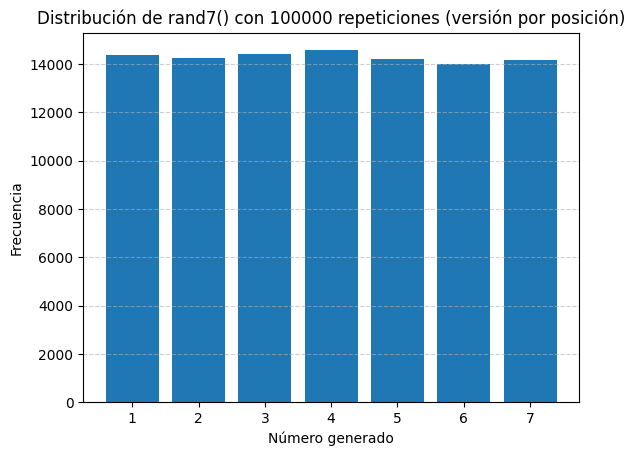

In [7]:
def probar_rand7(n=100000):
    resultados = [rand7() for _ in range(n)]
    conteo = Counter(resultados)

    print("Resultados:")
    for i in range(1, 8):
        print(f"{i}: {conteo[i]}")

    plt.bar(conteo.keys(), conteo.values())
    plt.title(f"Distribución de rand7() con {n} repeticiones")
    plt.xlabel("Número generado")
    plt.ylabel("Frecuencia")
    plt.xticks(range(1, 8))
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

probar_rand7()


He querido hacer otro metodo que sigue la misma fórmula pero me parece mas visual. Tenemos un array con 5 colores a la que cada posicion del array es un color. Si hacemos como antes, es coger dos parejas de colores aleatorias, dando 25 combinaciones posibles (no es lo mismo rojo azul, que azul rojo), de esas 25 opciones asignamos 3 a cada numero del 1 al 7 y descartamos 4.
De esta manera al generar dos numeros aleatorios del uno al 5 nos dara una combinacion de colores que esta asignada a un numero específico y si es una de las 4 opciones descartadas lo hará de nuevo

In [2]:
import random
from itertools import product
import matplotlib.pyplot as plt
from collections import Counter

colores = ["Rojo", "Verde", "Azul", "Amarillo", "Naranja"]

# Generamos todas las combinaciones ordenadas (25 en total)
combinaciones = list(product(colores, repeat=2))

# Creamos grupos de 3 combinaciones para cada valor del 1 al 7 (21 combinaciones)
asignaciones = {}
for i in range(7):
    for j in range(3):
        idx = i * 3 + j
        asignaciones[combinaciones[idx]] = i + 1  # asignar 1–7

# Las combinaciones restantes (22 a 25) se ignoran (rechazo)
combinaciones_validas = set(asignaciones.keys())

def rand5():
    return random.randint(1, 5)

def rand7():
    while True:
        c1 = colores[rand5() - 1]
        c2 = colores[rand5() - 1]
        par = (c1, c2) #elegimos un par de colores
        if par in asignaciones: #si el par de colores esta dentro de las válidas devuelve el número correspondiente
            return asignaciones[par]


Resultados:
1: 14239
2: 14222
3: 14284
4: 14303
5: 14268
6: 14422
7: 14262


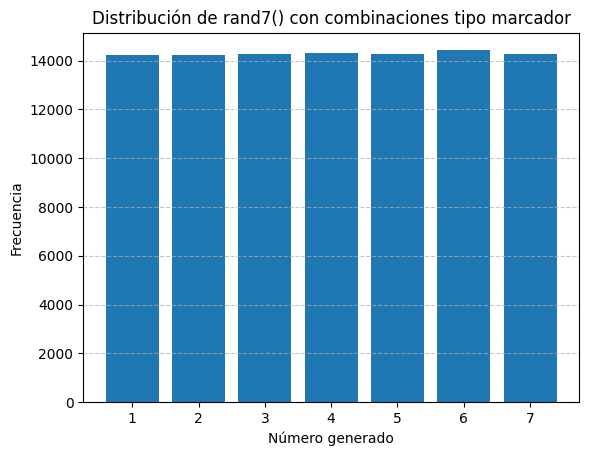

In [3]:
def probar_rand7(n=100000):
    resultados = [rand7() for _ in range(n)]
    conteo = Counter(resultados)

    print("Resultados:")
    for i in range(1, 8):
        print(f"{i}: {conteo[i]}")

    plt.bar(conteo.keys(), conteo.values())
    plt.title(f"Distribución de rand7() con {n} repeticiones")
    plt.xlabel("Número generado")
    plt.ylabel("Frecuencia")
    plt.xticks(range(1, 8))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

probar_rand7()
